## SOM for identifying the style of the driver


In [1]:
!pip install minisom

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10663 sha256=d2bc0780c7c734cbbb1a06b44c5dde52f72ed9c0b3a7bf5f06a51e7d6c2a8583
  Stored in directory: c:\users\nikhi\appdata\local\pip\cache\wheels\61\e8\de\cd2df73e85e467e1cf90ff918c6d6f388eff8e9029dae8bd78
Successfully built minisom


[[0.17871615 0.37624861 0.17967254 ... 0.45403022 0.9591637  0.06090326]
 [0.28014393 0.00670363 0.06520551 ... 0.45151674 0.88542829 0.25568343]
 [0.74793583 0.62865758 0.26392201 ... 0.33993515 0.72349491 0.44853792]
 ...
 [0.86032838 0.38068231 0.87610333 ... 0.10281375 0.44168673 0.81549813]
 [0.44277689 0.57579829 0.57239191 ... 0.81690797 0.31117675 0.68426514]
 [0.73275661 0.16700301 0.18187379 ... 0.72072436 0.63274859 0.99597413]]


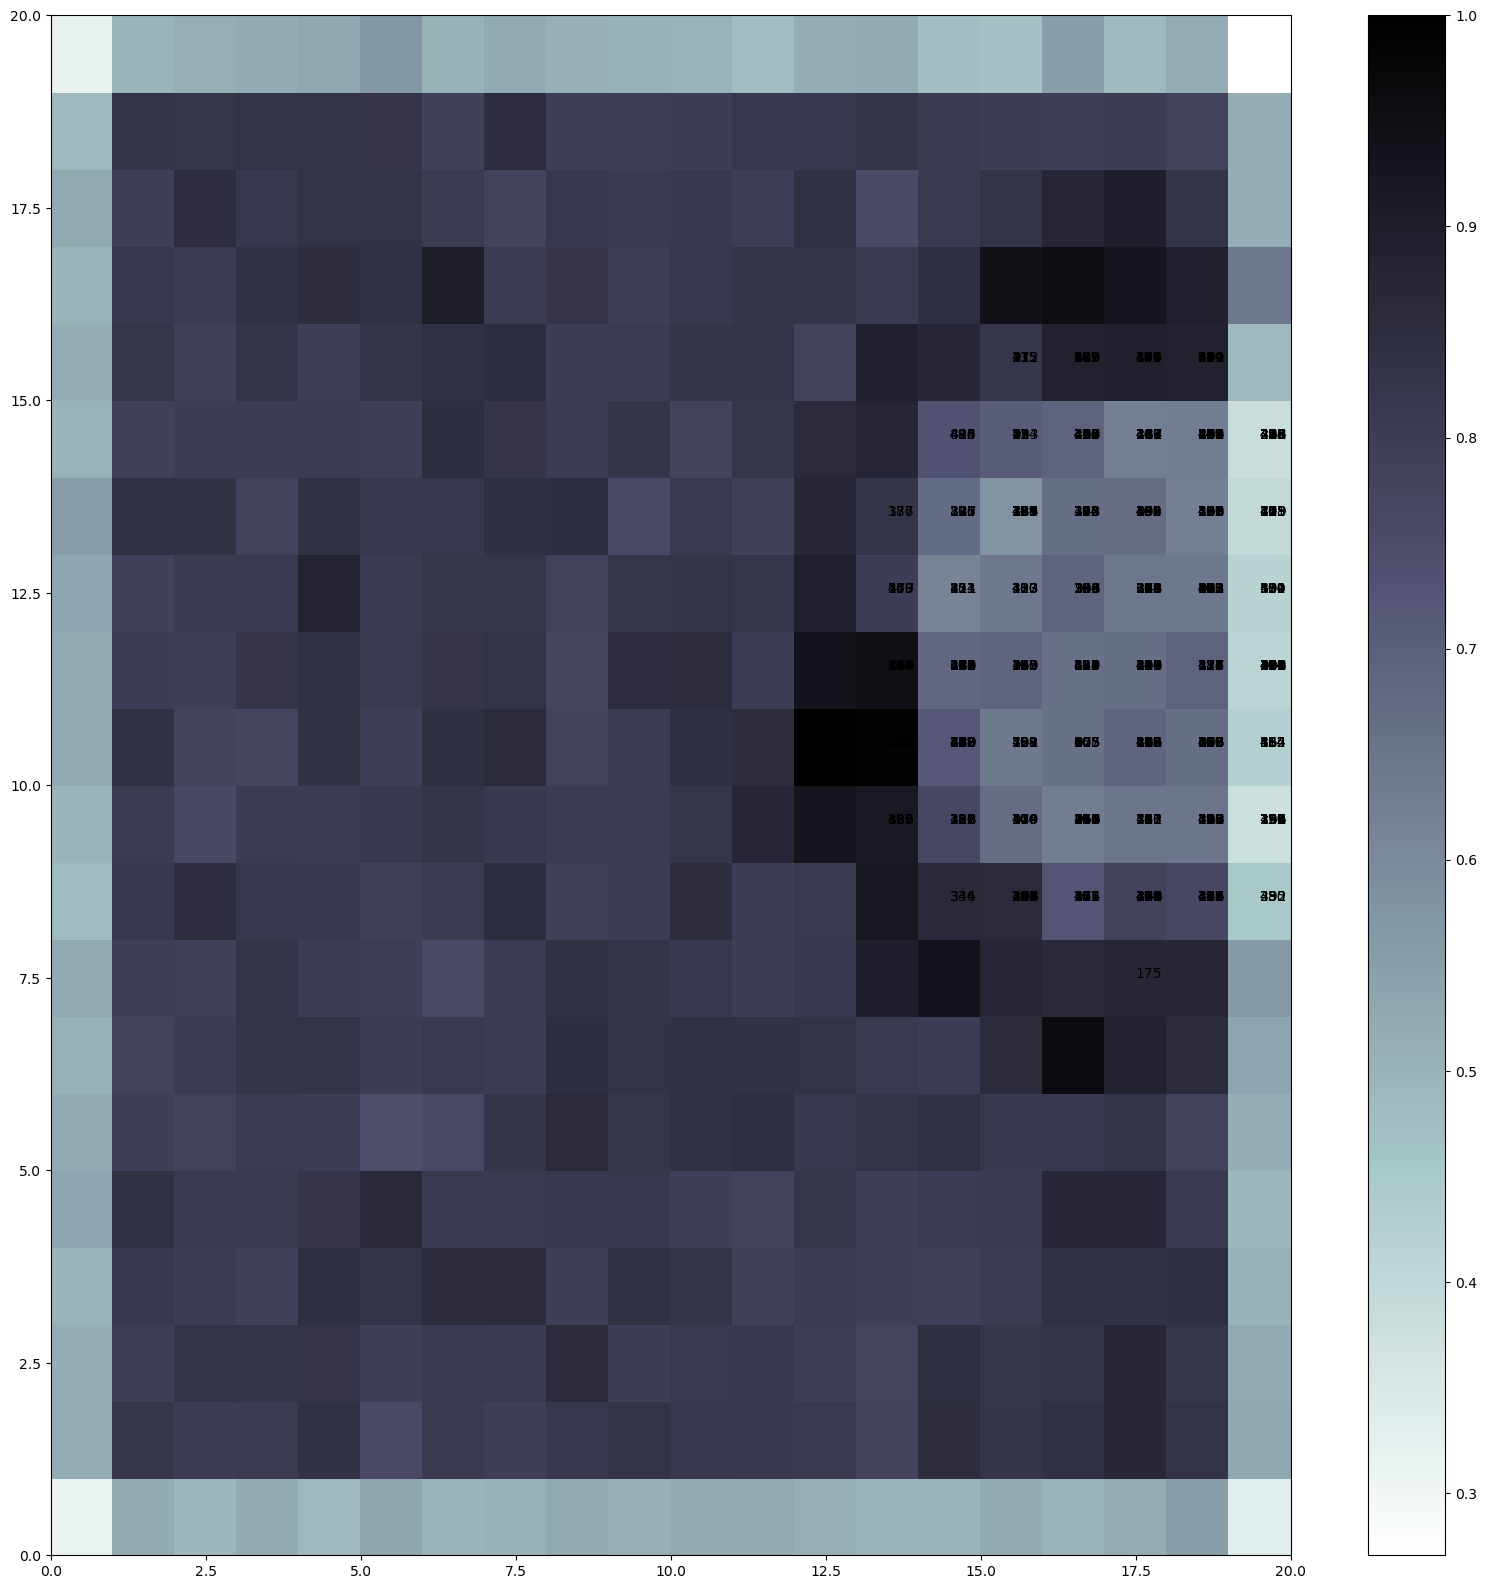

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

variables = {
    'Velocity': {'unit': 'm/s', 'preprocessing': 'sliding window', 'type': 'Vector of length 10'},
    'Accelerator Pedal Position': {'unit': '%', 'preprocessing': 'sliding window', 'type': 'Vector of length 10'},
    'Brake Pedal Position': {'unit': '%', 'preprocessing': 'sliding window', 'type': 'Vector of length 10'},
    'Fuel Consumed': {'unit': 'ml/s', 'preprocessing': 'Sum on sliding window', 'type': 'Scalar'},
    'Distance Travelled': {'unit': 'm', 'preprocessing': 'Sum on sliding window', 'type': 'Scalar'}
}
# Replace the dummy data with your actual data
velocity_data = np.random.rand(500, 10)  # Example data for velocity (Replace with actual data)
accelerator_data = np.random.rand(500, 10)  # Example data for accelerator pedal position
brake_data = np.random.rand(500, 10)  # Example data for brake pedal position
fuel_data = np.random.rand(500, 1)  # Example data for fuel consumed
distance_data = np.random.rand(500, 1)  # Example data for distance travelled

data = np.c_[velocity_data, accelerator_data, brake_data, fuel_data, distance_data]
data = data / data.max(axis=0)  # scaling data

print(data)
# Define the SOM parameters
map_dimensions = (20, 20)
num_iterations = 700
learning_rate = 0.5

# Initialize the SOM model
som = MiniSom(map_dimensions[0], map_dimensions[1], data.shape[1], sigma=1.0, learning_rate=learning_rate)

# Train the SOM on the data
som.train_random(data, num_iterations)

# Visualize the SOM
plt.figure(figsize=(map_dimensions[0], map_dimensions[1]))
for i, x in enumerate(data):
    winner = som.winner(x)
    plt.text(winner[0]+.5, winner[1]+.5, str(i), color='k')
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
plt.show()

In [10]:
import matplotlib.pyplot as plt


# Fig 5: Counts Plot
plt.figure(figsize=(8, 6))
counts_data = som.win_map(data)
counts = np.array([len(v) for k, v in counts_data.items()])

# Reshape the counts array to maintain the same number of elements (48 nodes)
num_nodes = len(counts)
rows, cols = 8, 6  # Adjust these values as needed
counts_grid = counts.reshape(rows, cols)

plt.imshow(counts_grid, cmap='Reds', interpolation='nearest')
plt.colorbar(label='Input Data Points')
plt.title('Counts Plot')
plt.show()

# Fig 6: Velocity Map with Clusters
plt.figure(figsize=(10, 8))
for node, data in enumerate(velocity_data):
    plt.plot(data, label=f'Node {node}')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity Map with Clusters')
plt.legend(title='Node')
plt.show()

# Fig 7: Accelerator Pedal Position Map
plt.figure(figsize=(10, 8))
for node, data in enumerate(accelerator_data):
    plt.plot(data, label=f'Node {node}')
plt.xlabel('Time (s)')
plt.ylabel('Accelerator Pedal Position (%)')
plt.title('Accelerator Pedal Position Map')
plt.legend(title='Node')
plt.show()

# Fig 8: Brake Pedal Position Map
plt.figure(figsize=(10, 8))
for node, data in enumerate(brake_data):
    plt.plot(data, label=f'Node {node}')
plt.xlabel('Time (s)')
plt.ylabel('Brake Pedal Position (%)')
plt.title('Brake Pedal Position Map')
plt.legend(title='Node')
plt.show()

# Fig 9: Fuel and Distance Map
plt.figure(figsize=(8, 8))
for node, data in enumerate(fuel_data):
    plt.scatter(0, 0, s=data, label=f'Node {node}', alpha=0.5)  # Using scatter plot to represent sector size
plt.xlabel('Fuel Consumption (ml/s)')
plt.ylabel('Distance Covered (m)')
plt.title('Fuel and Distance Map')
plt.legend(title='Node')
plt.show()

ValueError: cannot reshape array of size 52 into shape (8,6)

<Figure size 800x600 with 0 Axes>

## SOM (Breast Cancer)

In [11]:
from minisom import MiniSom
from sklearn.datasets import load_breast_cancer
import time

In [12]:
som_grid_rows = 30
som_grid_columns = 20
iterations = 500
sigma = 1
learning_rate = 0.5 

In [13]:

# Load the breast cancer dataset
breast_cancer_data = load_breast_cancer()

# Access the data and target separately
data = breast_cancer_data.data
target = breast_cancer_data.target


In [14]:
som = MiniSom(x = som_grid_rows,
             y = som_grid_columns,
             input_len = data.shape[1],
             sigma = sigma,
             learning_rate = learning_rate)
som.random_weights_init(data)

In [15]:
start_time = time.time()
som.train_random(data,iterations)
elapsed_time = time.time()-start_time
print(elapsed_time, " seconds")

0.0780646800994873  seconds


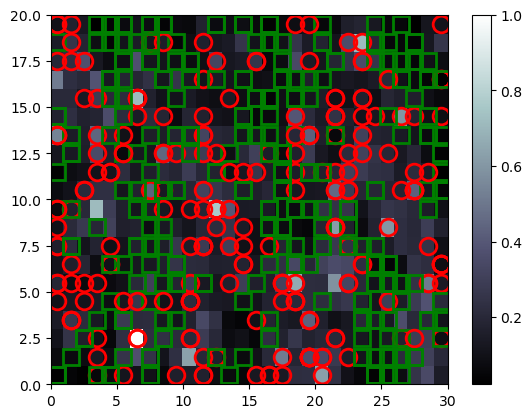

In [18]:
from pylab import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o','s','D']
colors = ['r','g','b']

for cnt,xx in enumerate(data):
    w = som.winner(xx)
    plot(w[0]+.5,w[1]+.5,markers[target[cnt]],markerfacecolor = 'None',
        markeredgecolor = colors[target[cnt]],markersize = 12, markeredgewidth = 2)
axis([0,som._weights.shape[0],0,som._weights.shape[1]])
show()

### red = malignant tumors
green = nonmalignant tumors


## CCA (breast cancer)

Canonical Correlations: [[0.98569103]
 [0.16856213]]


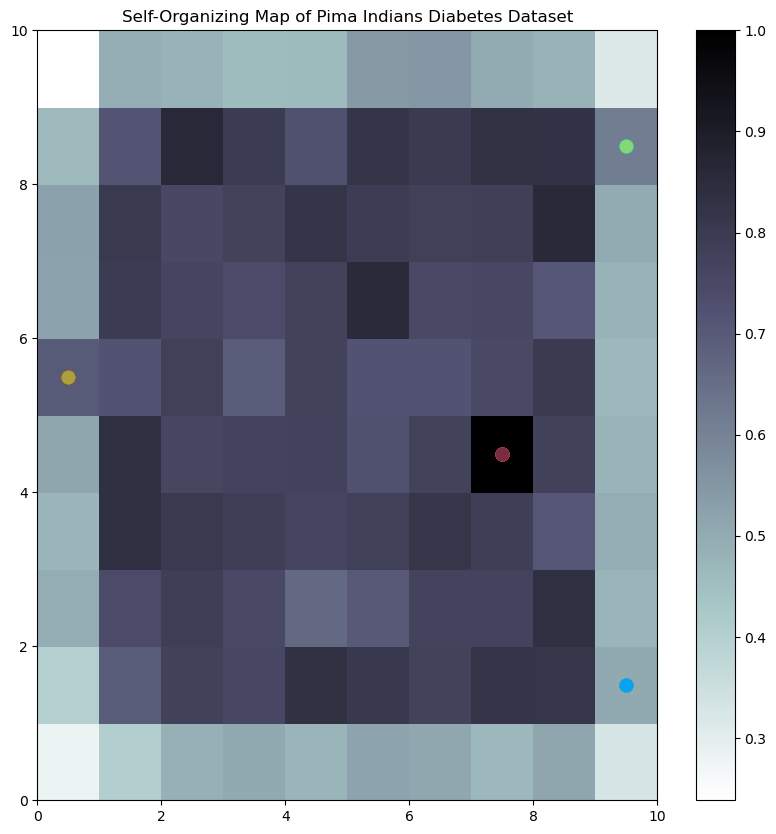

In [10]:
import numpy as np
from sklearn.datasets import load_diabetes
from minisom import MiniSom
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt

# Load the Pima Indians Diabetes dataset
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target

# Normalize the data
data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

# Define SOM parameters
map_size = (10, 10)  # Grid size
input_len = data.shape[1]  # Number of features

# Initialize SOM
som = MiniSom(map_size[0], map_size[1], input_len, sigma=0.3, learning_rate=0.5)

# Train the SOM
som.train_random(data, 1000)  # 1000 iterations

# Get SOM weights for the training data
som_weights = np.array([som.winner(x) for x in data])

# Flatten the SOM weights
flattened_weights = som_weights.reshape(-1, 2)

# Perform CCA
cca = CCA(n_components=1)  # Number of canonical components to find
cca.fit(flattened_weights, target)

# Get canonical variables
som_canonical, target_canonical = cca.transform(flattened_weights, target)

# Print canonical correlations
print("Canonical Correlations:", cca.x_rotations_)

# Map SOM
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Marking the winning neurons for each sample
for i, (x, t) in enumerate(zip(data, target)):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor=plt.cm.jet(t / 200.), markeredgecolor='None', markersize=10, alpha=0.5)  # mark the winner neurons

plt.title('Self-Organizing Map of Pima Indians Diabetes Dataset')
plt.show()


## Kohonnen SOM for the CCA (Iris dataset)

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math 

iris = load_iris()
features = iris.data
labels = iris.target

sc = MinMaxScaler(feature_range = (0,1))
features = sc.fit_transform(features)

# Perform Canonical Correlation Analysis (CCA)
cca = CCA(n_components=1)
cca.fit(X, y)
X_c, y_c = cca.transform(X, y)

sigma = 1.5
lr = 0.5
n_features = features.shape[1]
n_samples = features.shape[0]

map_size = 5 * math.sqrt(n_samples)
map_height = map_width = math.ceil(math.sqrt(map_size))


print(f'(map_height, map_width) = ({map_height}, {map_width})')
print(f'Number of features: {n_features}')

som = MiniSom(x=map_height, y=map_width, input_len=n_features, sigma=sigma, learning_rate=lr, 
              neighborhood_function='gaussian', random_seed=123)
 
som.pca_weights_init(features)
som.train(data=features, num_iteration=1000, verbose=True)  # random training

print('-------------\nDistance Map\n------------')
print(f'Shape: {som.distance_map().shape}')
print(f'First Line: {som.distance_map().T[0]}')

features[0] 
(map_height, map_width) = (8, 8)
Number of features: 4
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.06946712589245212
-------------
Distance Map
------------
Shape: (8, 8)
First Line: [0.12388322 0.27913853 0.51099396 0.43024834 0.20168752 0.1898738
 0.29749631 0.19296195]


C:\Users\nikhi\AppData\Roaming\Python\Python311\site-packages\minisom.py:388: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


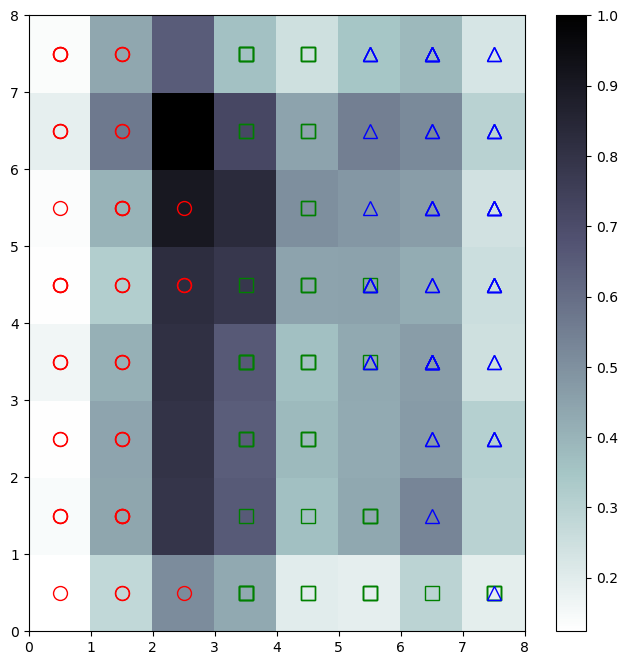

In [6]:
plt.figure(figsize=(map_height, map_width))

# plot U-matrix
u_matrix = som.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')
plt.colorbar()

# plot markers
markers = ['o', 's', '^']   # 'setosa', 'versicolor' 'virginica'
colors = ['r', 'g', 'b']
for feature, label in zip(features, labels):
    w = som.winner(feature)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 
        markers[label], markeredgecolor = colors[label], 
        markerfacecolor = 'None', markersize = 10, markeredgewidth = 1)

plt.show()

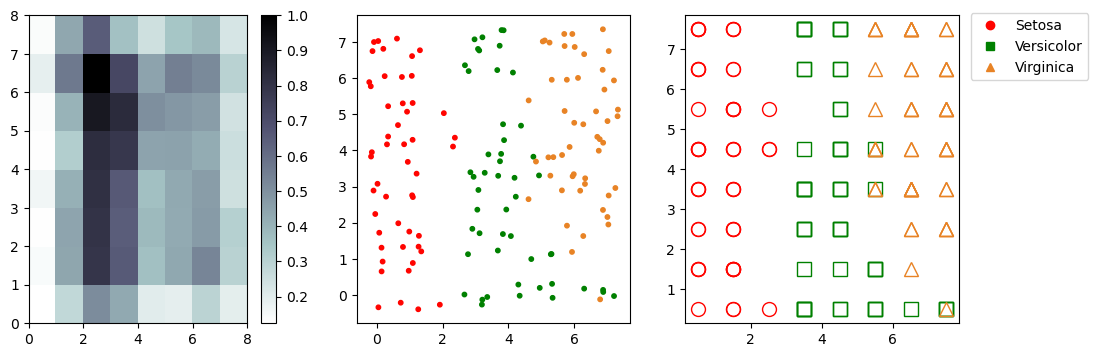

In [8]:
def plot_distance_map(ax, fig):
    p = ax.pcolor(som.distance_map().T, cmap='bone_r') # cmap='Blues'
    # ax.colorbar()
    fig.colorbar(p, ax=ax)

def plot_clusters_scatter(ax):
    # Get the winning neuron coordinates for each sample 
    # The coordinates are transformed into an array for the scatter plot: (1,1) => [1,1]
    winning_neurons = np.array([som.winner(x) for x in features])

    # Add a random offset to avoid overlaps between points within the same cell
    offset = np.random.uniform(low=-0.4, high=0.4, size=(len(features), 2))
    winning_neurons = winning_neurons + offset

    # Define the colors based on the labels
    colors = ['#ff0400', 'g', '#e88325']
    label_colors = [colors[label] for label in labels]

    # Create the scatter plot
    # 1st column represent x and second, y coordinate
    ax.scatter(winning_neurons[:,0], winning_neurons[:,1], s=10, c=label_colors)

def plot_clusters_markers(ax):
    
    markers = ['o', 's', '^']
    colors = ['#ff0400', 'g', '#e88325']
    for i, feature in enumerate(features):
        w = som.winner(feature)
        ax.plot(w[0] + 0.5, w[1] + 0.5, 
            markers[labels[i]], markeredgecolor = colors[labels[i]], 
            markerfacecolor = 'None', markersize = 10, markeredgewidth = 1)
        
    # legend
    ax.legend(handles=[plt.Line2D([], [], color='#ff0400', marker='o', linestyle='None', label='Setosa'),
                    plt.Line2D([], [], color='green', marker='s', linestyle='None', label='Versicolor'),
                    plt.Line2D([], [], color='#e88325', marker='^', linestyle='None', label='Virginica')],
                    bbox_to_anchor=(1.5, 1.03))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

plot_distance_map(axes[0], fig)
plot_clusters_scatter(axes[1])
plot_clusters_markers(axes[2])

plt.show()

